In [73]:
import pandas as pd
from __future__ import division

In [130]:
pd.options.display.html.table_schema = False

In [2]:
caminho = "c:/Users/Felipe/Documents/GitHub/pythonstat/ex_regressao_outros/"

In [3]:
Adv = pd.read_csv(caminho+'/Advertising.csv', index_col=0)

Por = pd.read_csv(caminho+'Portland_housePrices.csv', index_col=None)

In [131]:
/display Por.head(3)

/display Adv.head(3)

;print \nverificado se os datasets estão OK

,tamanho,quartos,preco
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3



verificado se os datasets estão OK


In [68]:
def seriesToSingleDataFrame(data, coluna): return data.loc[:,[coluna]]

def calc_rss(y,predicted):
    return float(((predicted - y) ** 2.0).sum())

def norm(vetor): return vetor/(vetor.max())

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from pylab import *

## Exercício 1

Para as duas bases de treinamento de regressão (<i>Advertising</i> e <i>Portland_housePrices</i>), avalie quais são as melhores parametrizações (use inspeção visual e RSS/R²).

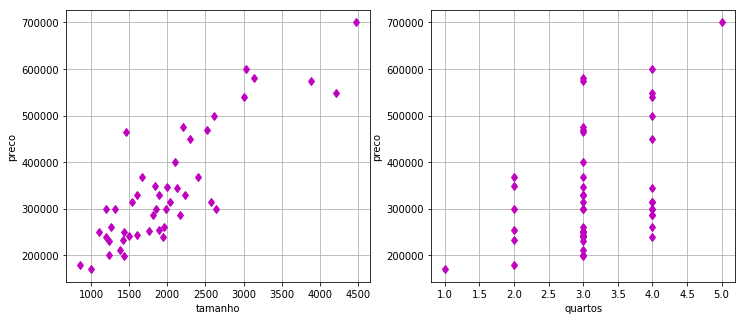

In [7]:
figure(figsize=[12,5])
subplot(1,2,1)
plot(Por.tamanho.values, Por.preco.values, 'dm'); grid()
xlabel(Por.tamanho.name); ylabel(Por.preco.name);

subplot(1,2,2)
plot(Por.quartos.values, Por.preco.values, 'dm'); grid()
xlabel(Por.quartos.name); ylabel(Por.preco.name);

In [8]:
k=2

neigh = KNeighborsRegressor(n_neighbors=k,weights='uniform')

porTamanhoD = seriesToSingleDataFrame(Por,'tamanho')
porPrecoD = seriesToSingleDataFrame(Por,'preco')

neigh.fit(porTamanhoD,porPrecoD)

precoPredict = neigh.predict(porTamanhoD)

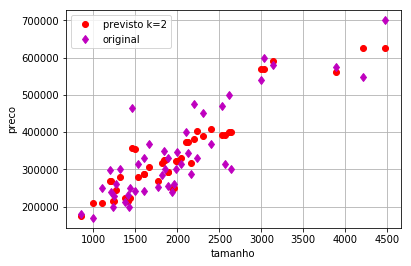

In [9]:
plot(Por.tamanho.values, precoPredict, 'or', label="previsto k=" + str(k));  
plot(Por.tamanho.values, Por.preco.values, 'dm', label="original");  
xlabel(Por.tamanho.name); ylabel(Por.preco.name); grid();legend();

In [10]:
calc_rss( norm(Por.preco.values), norm(precoPredict.flatten()))

1129526122.36462

In [11]:
def KnnGeraRss(k, dataset, colunaA, colunaY, peso='uniform'):
    
    neigh = KNeighborsRegressor(n_neighbors=k,weights=peso)

    X = seriesToSingleDataFrame(dataset,colunaA)
    Y = seriesToSingleDataFrame(dataset,colunaY)

    neigh.fit(X,Y)

    Predict = neigh.predict(X)

    return calc_rss( norm(dataset[colunaY].values), norm(Predict.flatten()))
    

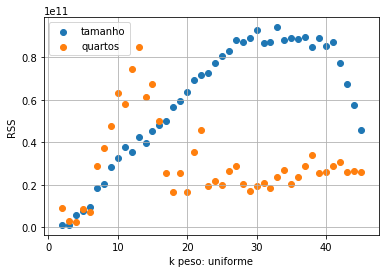

In [12]:
kmax =Por.preco.count()
           
otimizaknnPorTam = np.array([ [x,KnnGeraRss(x,Por,'tamanho', 'preco')] for x in range(2,kmax-1)])
otimizaknnPorQua = np.array([ [x,KnnGeraRss(x,Por,'quartos', 'preco')] for x in range(2,kmax-1)])

scatter( *otimizaknnPorTam.T, label="tamanho"); xlabel("k"); ylabel("RSS"); 
scatter( *otimizaknnPorQua.T, label="quartos"); xlabel("k peso: uniforme"); ylabel("RSS") ;legend(); grid()

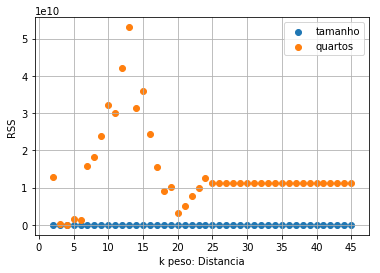

In [13]:
kmax =Por.preco.count()
           
otimizaknnPorTam = np.array([ [x,KnnGeraRss(x,Por,'tamanho', 'preco', peso='distance')] for x in range(2,kmax-1)])
otimizaknnPorQua = np.array([ [x,KnnGeraRss(x,Por,'quartos', 'preco', peso='distance')] for x in range(2,kmax-1)])

scatter( *otimizaknnPorTam.T, label="tamanho"); xlabel("k"); ylabel("RSS"); 
scatter( *otimizaknnPorQua.T, label="quartos"); xlabel("k peso: Distancia"); ylabel("RSS") ;legend(); grid()
xticks(range(0,kmax,5));

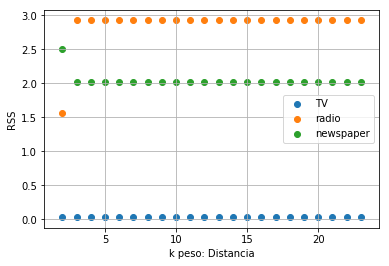

In [14]:
kmax = Adv.sales.count()/8
           
otimizaknnPorA = np.array([ [x,KnnGeraRss(x,Adv,'TV', 'sales', peso='distance')] for x in range(2,kmax-1)])
otimizaknnPorB = np.array([ [x,KnnGeraRss(x,Adv,'radio', 'sales', peso='distance')] for x in range(2,kmax-1)])
otimizaknnPorC = np.array([ [x,KnnGeraRss(x,Adv,'newspaper', 'sales', peso='distance')] for x in range(2,kmax-1)])

scatter( *otimizaknnPorA.T, label="TV"); xlabel("k"); ylabel("RSS"); 
scatter( *otimizaknnPorB.T, label="radio"); xlabel("k"); ylabel("RSS"); 
scatter( *otimizaknnPorC.T, label="newspaper"); xlabel("k peso: Distancia"); ylabel("RSS") ;legend(); grid()

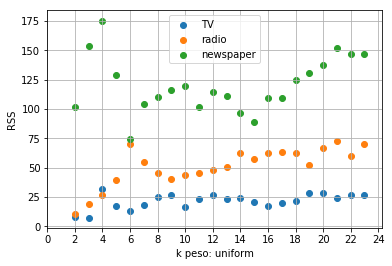

In [15]:
kmax = Adv.sales.count()/8
           
otimizaknnPorA = np.array([ [x,KnnGeraRss(x,Adv,'TV', 'sales')] for x in range(2,kmax-1)])
otimizaknnPorB = np.array([ [x,KnnGeraRss(x,Adv,'radio', 'sales')] for x in range(2,kmax-1)])
otimizaknnPorC = np.array([ [x,KnnGeraRss(x,Adv,'newspaper', 'sales')] for x in range(2,kmax-1)])

scatter( *otimizaknnPorA.T, label="TV"); xlabel("k"); ylabel("RSS"); 
scatter( *otimizaknnPorB.T, label="radio"); xlabel("k"); ylabel("RSS"); 
scatter( *otimizaknnPorC.T, label="newspaper"); xlabel("k peso: uniform"); ylabel("RSS") ;legend(); grid()
xticks(range(0,kmax,2));

In [16]:
from sklearn.tree import DecisionTreeRegressor  
#Regression tree
# create a regressor object 
tree = DecisionTreeRegressor()  
    
porTamanhoD = seriesToSingleDataFrame(Por,'tamanho')
porQuartoD = seriesToSingleDataFrame(Por,'quartos')
porPrecoD = seriesToSingleDataFrame(Por,'preco')
    
# fit the regressor with X and Y data 
tree.fit(porTamanhoD, porPrecoD) ;

In [17]:
from sklearn.tree import export_graphviz  
 
export_graphviz(tree, out_file =caminho+'tree.dot', 
               feature_names =['Tamanho'])

0.0
11251378336.5


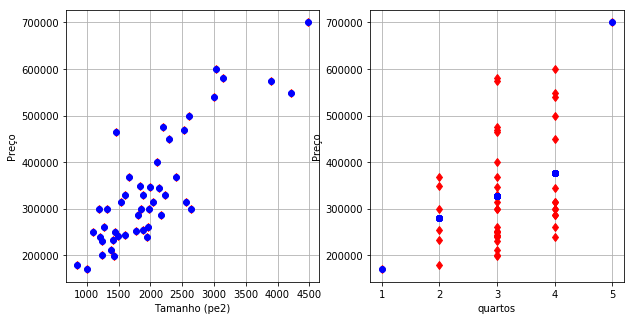

In [18]:

figure(figsize=[10,5])
subplot(1,2,1)

plot(porTamanhoD, porPrecoD,"dr")

tree.fit(porTamanhoD, porPrecoD) ;
y_t = tree.predict(porTamanhoD)

plot(porTamanhoD, y_t, 'ob');grid()


xlabel('Tamanho (pe2)');
ylabel(u'Preço');

print calc_rss(norm(Por.preco.values), norm(y_t.flatten()) )

subplot(1,2,2)
plot(porQuartoD, porPrecoD,"dr"); 

tree.fit(porQuartoD, porPrecoD) ;
y_t = tree.predict(porQuartoD)

plot(porQuartoD, y_t, 'ob')

xlabel(u'quartos');
ylabel(u'Preço'); grid(True)

print calc_rss(norm(Por.preco.values), norm(y_t.flatten()) )

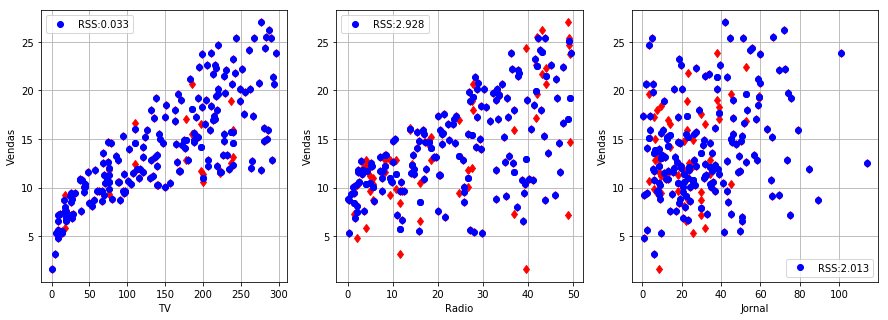

In [19]:
figure(figsize=[15,5])
subplot(1,3,1)

advTVD = seriesToSingleDataFrame(Adv, 'TV')
advRadioD = seriesToSingleDataFrame(Adv, 'radio')
advJornalD = seriesToSingleDataFrame(Adv, 'newspaper')
advSalesD = seriesToSingleDataFrame(Adv, 'sales')

plot(advTVD, advSalesD,"dr")
 
tree.fit(advTVD, advSalesD) ;

y_t = tree.predict(advTVD)

plot(advTVD, y_t, 'ob', label = "RSS:{0:.3f}".format( calc_rss(norm(Adv.sales.values), norm(y_t.flatten()) ) ) )

xlabel('TV'); ylabel(u'Vendas');  grid(); legend()

subplot(1,3,2)

plot(advRadioD, advSalesD,"dr"); 

tree.fit(advRadioD, advSalesD) ;
y_t = tree.predict(advRadioD)

plot(advRadioD, y_t, 'ob', label = "RSS:{0:.3f}".format( calc_rss(norm(Adv.sales.values), norm(y_t.flatten()) ) ) )
xlabel(u'Radio');
ylabel(u'Vendas'); grid(True); legend()

subplot(1,3,3)

plot(advJornalD, advSalesD,"dr"); 

tree.fit(advJornalD, advSalesD) ;
y_t = tree.predict(advJornalD)

plot(advJornalD, y_t, 'ob', label = "RSS:{0:.3f}".format( calc_rss(norm(Adv.sales.values), norm(y_t.flatten()) ) ) )

xlabel(u'Jornal');
ylabel(u'Vendas'); grid(True); legend(loc='lower right');



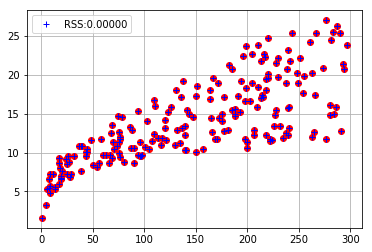

In [20]:
AdvCampos = Adv.drop(columns=['sales'])

advTVD = seriesToSingleDataFrame(Adv, 'TV')
advRadioD = seriesToSingleDataFrame(Adv, 'radio')
advJornalD = seriesToSingleDataFrame(Adv, 'newspaper')
advSalesD = seriesToSingleDataFrame(Adv, 'sales')

#plot(advTVD, advSalesD,"dr")
 
tree.fit(AdvCampos, advSalesD) ;

y_t = tree.predict(AdvCampos)

plot(advTVD, advSalesD, "or")

plot(advTVD, y_t, '+b', label = "RSS:{0:.5f}".format( calc_rss(norm(Adv.sales.values), norm(y_t.flatten()) ) ) );

legend(); grid()

In [21]:
figure(figsize=[10,5])

porCampos = Por.drop(columns=['preco'])
porPreco = seriesToSingleDataFrame(Por, 'preco')

porTamanhoD = seriesToSingleDataFrame(Por,'tamanho')
porQuartoD = seriesToSingleDataFrame(Por,'quartos')
porPrecoD = seriesToSingleDataFrame(Por,'preco')


#plot(advTVD, advSalesD,"dr")
 
tree.fit(PorCampos, porPreco) ;

y_t = tree.predict(porCampos)

subplot(1,2,1)
plot(porQuartoD, porPreco, "or")
plot(porQuartoD, y_t, '+g', label = "RSS:{0:.5f}".format( calc_rss(norm(Por.preco.values), norm(y_t.flatten()) ) ) );
legend(); grid()

subplot(1,2,2)
plot(porTamanhoD, porPreco, "or")
plot(porTamanhoD, y_t, '+c', label = "RSS:{0:.5f}".format( calc_rss(norm(Por.preco.values), norm(y_t.flatten()) ) ) );
legend(); grid()

NameError: name 'PorCampos' is not defined

<Figure size 720x360 with 0 Axes>

### Ex 3

In [109]:
import numpy as np
from sklearn.metrics import r2_score

In [48]:
primeiros30 = int(Por.preco.count()*0.3)

In [49]:
PorTeste = Por.loc[0: primeiros30]
PorTreino = Por.loc[primeiros30::]

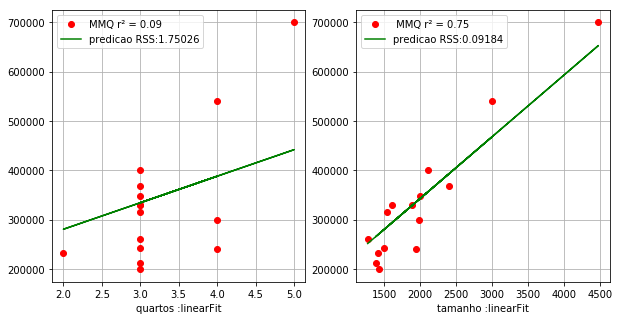

In [127]:
porCamposTreino = PorTreino.drop(columns=['preco'])
porPrecoTreino = seriesToSingleDataFrame(PorTreino, 'preco')
porCamposTeste = PorTeste.drop(columns=['preco'])

mfit = np.polyfit( PorTreino.quartos.values, PorTreino.preco.values,1)

mfitFuncao = np.poly1d(mfit)

mpredicao = mfitFuncao(PorTeste.quartos.values)

rsst = calc_rss( norm(PorTeste.preco.values), norm(mpredicao ) )

figure(figsize=[10,5])
subplot(1,2,1)
plot(porCamposTeste.quartos, PorTeste.preco, "or", label=u"MMQ r² = {0:.2f}".format(r2_score(PorTeste.preco.values, mpredicao) ** 2. ) )
plot(PorTeste.quartos, mpredicao, '-g', label = "predicao RSS:{0:.5f}".format(rsst)) 
xlabel(PorTeste.quartos.name + " :linearFit" ); legend(); grid()

mfit = np.polyfit( PorTreino.tamanho.values, PorTreino.preco.values,1)

mfitFuncao = np.poly1d(mfit)

mpredicao = mfitFuncao(PorTeste.tamanho.values)

rsst = calc_rss( norm(PorTeste.preco.values), norm(mpredicao ) )

subplot(1,2,2)

plot(porCamposTeste.tamanho, PorTeste.preco, "or", label=u" MMQ r² = {0:.2f}".format(r2_score(PorTeste.preco.values, mpredicao) ** 2. ) )
plot(PorTeste.tamanho, mpredicao, '-g', label = "predicao RSS:{0:.5f}".format(rsst)) 
xlabel(PorTeste.tamanho.name + " :linearFit" ); legend(); grid()


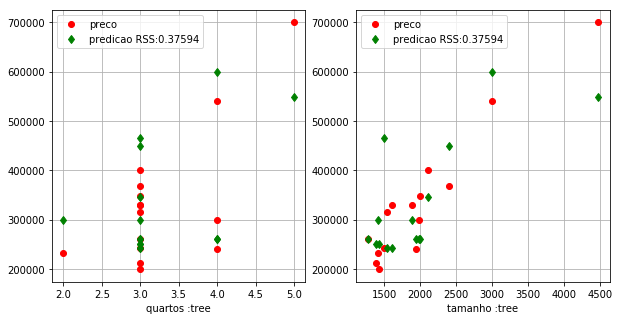

In [95]:
figure(figsize=[10,5])

porCamposTreino = PorTreino.drop(columns=['preco'])
porPrecoTreino = seriesToSingleDataFrame(PorTreino, 'preco')
porCamposTeste = PorTeste.drop(columns=['preco'])

X = porCamposTreino
Y = porPrecoTreino

tree.fit(X, Y) ;

y_t = tree.predict(porCamposTeste)

subplot(1,2,1)
plot(porCamposTeste.quartos, PorTeste.preco, "or")

rsst = calc_rss( norm(PorTeste.preco.values), norm(y_t.flatten()) ) 

plot(PorTeste.quartos, y_t, 'dg', label = "predicao RSS:{0:.5f}".format(rsst)) 
xlabel(PorTeste.quartos.name + " :tree" ); legend(); grid()

subplot(1,2,2)
plot(porCamposTeste.tamanho, PorTeste.preco, "or")

rsst = calc_rss( norm(PorTeste.preco.values), norm(y_t.flatten()) ) 

plot(PorTeste.tamanho, y_t, 'dg', label = "predicao RSS:{0:.5f}".format(rsst)) 
xlabel(PorTeste.tamanho.name + " :tree" );
legend(); grid()



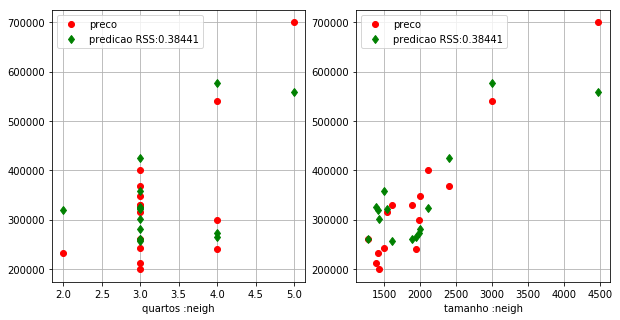

In [97]:
figure(figsize=[10,5])

porCamposTreino = PorTreino.drop(columns=['preco'])
porPrecoTreino = seriesToSingleDataFrame(PorTreino, 'preco')
porCamposTeste = PorTeste.drop(columns=['preco'])

X = porCamposTreino
Y = porPrecoTreino

neigh = KNeighborsRegressor(n_neighbors=3, weights='distance')
    
neigh.fit(X, Y) ;

y_t = neigh.predict(porCamposTeste)

subplot(1,2,1)
plot(porCamposTeste.quartos, PorTeste.preco, "or")

rsst = calc_rss( (PorTeste.preco.values)/float(PorTeste.preco.values.max()), y_t.flatten()/y_t.flatten().max() ) 

plot(PorTeste.quartos, y_t, 'dg', label = "predicao RSS:{0:.5f}".format(rsst)) 

xlabel(PorTeste.quartos.name + " :neigh") ;legend(); grid()

subplot(1,2,2)
plot(porCamposTeste.tamanho, PorTeste.preco, "or")

rsst = calc_rss( (PorTeste.preco.values)/float(PorTeste.preco.values.max()), y_t.flatten()/y_t.flatten().max() ) 

plot(PorTeste.tamanho, y_t, 'dg', label = "predicao RSS:{0:.5f}".format(rsst)) 
xlabel(PorTeste.tamanho.name + " :neigh") ;legend(); grid()

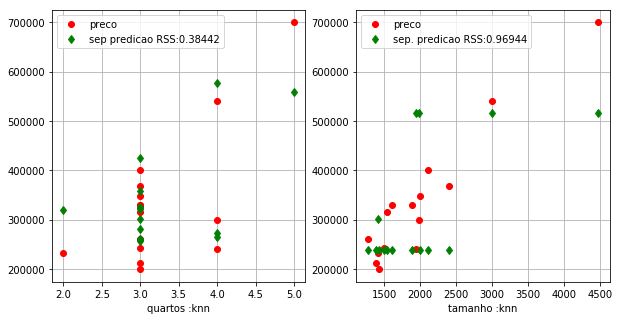

In [91]:
figure(figsize=[10,5])

porTamanhoTreino = seriesToSingleDataFrame(PorTreino, 'tamanho')
porQuartosTreino = seriesToSingleDataFrame(PorTreino, 'quartos')
porPrecoTreino = seriesToSingleDataFrame(PorTreino, 'preco')

porTamanhoTeste = seriesToSingleDataFrame(PorTeste, 'tamanho')
porQuartosTeste = seriesToSingleDataFrame(PorTeste, 'quartos')
porPrecoTeste = seriesToSingleDataFrame(PorTeste, 'preco')

X = porTamanhoTreino
Y = porPrecoTreino

neigh = KNeighborsRegressor(n_neighbors=3, weights='distance')
    
neigh.fit(X, Y) ;

y_t = neigh.predict(porTamanhoTeste)

subplot(1,2,1)
plot(porCamposTeste.quartos, PorTeste.preco, "or")

rsst = calc_rss( (PorTeste.preco.values)/float(PorTeste.preco.values.max()), y_t.flatten()/y_t.flatten().max() ) 

plot(PorTeste.quartos, y_t, 'dg', label = "sep predicao RSS:{0:.5f}".format(rsst)) 

xlabel(PorTeste.quartos.name + " :knn"); legend(); grid()

subplot(1,2,2)

X = porQuartosTreino
Y = porPrecoTreino

neigh = KNeighborsRegressor(n_neighbors=3, weights='distance')
    
neigh.fit(X, Y) ;

y_t = neigh.predict(porQuartosTeste)

plot(porCamposTeste.tamanho, PorTeste.preco, "or")

rsst = calc_rss( (PorTeste.preco.values)/float(PorTeste.preco.values.max()), y_t.flatten()/y_t.flatten().max() ) 

plot(PorTeste.tamanho, y_t, 'dg', label = "sep. predicao RSS:{0:.5f}".format(rsst)) 
xlabel(PorTeste.tamanho.name + " :knn"); legend(); grid() 

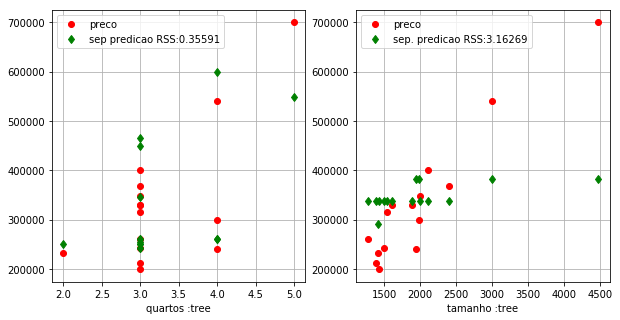

In [88]:
figure(figsize=[10,5])

porTamanhoTreino = seriesToSingleDataFrame(PorTreino, 'tamanho') 
porQuartosTreino = seriesToSingleDataFrame(PorTreino, 'quartos')
porPrecoTreino = seriesToSingleDataFrame(PorTreino, 'preco')

porTamanhoTeste = seriesToSingleDataFrame(PorTeste, 'tamanho')
porQuartosTeste = seriesToSingleDataFrame(PorTeste, 'quartos')
porPrecoTeste = seriesToSingleDataFrame(PorTeste, 'preco')

X = porTamanhoTreino
Y = porPrecoTreino
    
tree.fit(X, Y) ;

y_t = tree.predict(porTamanhoTeste)

subplot(1,2,1)
plot(porCamposTeste.quartos, PorTeste.preco, "or")

rsst = calc_rss( (PorTeste.preco.values)/float(PorTeste.preco.values.max()), y_t.flatten()/y_t.flatten().max() ) 

plot(PorTeste.quartos, y_t, 'dg', label = "sep predicao RSS:{0:.5f}".format(rsst)) 

xlabel(PorTeste.quartos.name + " :tree"); legend(); grid()

subplot(1,2,2)

X = porQuartosTreino
Y = porPrecoTreino
   
tree.fit(X, Y) ;

y_t = tree.predict(porQuartosTeste)

plot(porCamposTeste.tamanho, PorTeste.preco, "or")

rsst = calc_rss( (PorTeste.preco.values)/float(PorTeste.preco.values.max()), y_t.flatten()/y_t.flatten().max() ) 

plot(PorTeste.tamanho, y_t, 'dg', label = "sep. predicao RSS:{0:.5f}".format(rsst)) 
xlabel(PorTeste.tamanho.name + " :tree"); legend(); grid() 

In [26]:
primeiros30 = int(Adv.sales.count()*0.3)

AdvTeste = Adv.loc[0:primeiros30]
AdvTreino = Adv.loc[primeiros30::]

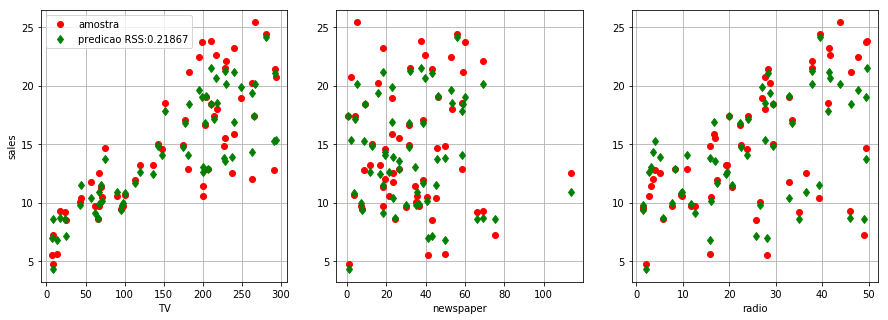

In [72]:
figure(figsize=[15,5])

AdvCamposTreino = AdvTreino.drop(columns=['sales'])
AdvSalesTreino = seriesToSingleDataFrame(AdvTreino, 'sales')


AdvCamposTeste = AdvTeste.drop(columns=['sales'])

X = AdvCamposTreino
Y = AdvSalesTreino

neigh = KNeighborsRegressor(n_neighbors=3, weights='distance')
    
neigh.fit(X, Y) ;

y_t = neigh.predict(AdvCamposTeste)

subplot(1,3,1)
plot(AdvCamposTeste.TV , AdvTeste.sales, "or", label="amostra")

rsst = calc_rss( norm(AdvTeste.sales.values), norm(y_t.flatten()) ) 

plot(AdvTeste.TV, y_t, 'dg', label = "predicao RSS:{0:.5f}".format(rsst)) 
xlabel(AdvTeste.TV.name); ylabel('sales')

legend(); grid()

subplot(1,3,2)
plot(AdvCamposTeste.newspaper , AdvTeste.sales, "or")

rsst = calc_rss( norm(AdvTeste.sales.values), norm(y_t.flatten()) ) 

plot(AdvTeste.newspaper, y_t, 'dg', label = "predicao RSS:{0:.5f}".format(rsst)) 
xlabel(AdvTeste.newspaper.name); grid()


subplot(1,3,3)
plot(AdvCamposTeste.radio , AdvTeste.sales, "or")

rsst = calc_rss( norm(AdvTeste.sales.values), norm(y_t.flatten()) ) 

plot(AdvTeste.radio, y_t, 'dg', label = "predicao RSS:{0:.5f}".format(rsst)) 
xlabel(AdvTeste.radio.name); grid()

In [66]:
from __future__ import division

In [132]:
import plotly

In [158]:
dadosB = pd.read_csv(caminho+"bosch_tools.txt", sep="\t");

dadosB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 10 columns):
Unnamed: 0           49 non-null int64
Material             49 non-null int64
DescricaoMaterial    49 non-null object
Centro               49 non-null float64
Custo acumulado      49 non-null object
Custo/pç.            49 non-null object
QuantidadeEntrada    49 non-null float64
PartNumber           49 non-null int64
QuebrasN             49 non-null int64
Custopeca            49 non-null float64
dtypes: float64(3), int64(4), object(3)
memory usage: 3.9+ KB


In [164]:
dadosB['custoPorPeca'] = dadosB['Custo/pç.'].str.replace(",", ".").astype(float)

In [166]:
dadosB['custoAcumulado'] = dadosB['Custo acumulado'].str.replace(",", ".").astype(float);

1.1095835347731065

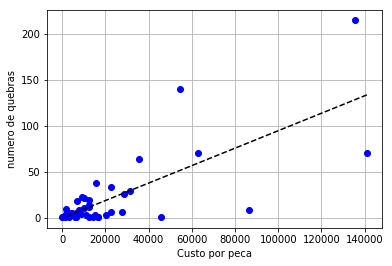

In [175]:
x = dadosB.custoAcumulado
y = dadosB.QuebrasN

coef = np.polyfit(x,y,1) 
poly1d_fn = np.poly1d(coef) 


plt.plot(x,y, 'bo', x, poly1d_fn(x), '--k'); plt.grid()
plt.xlabel("Custo por peca") ; plt.ylabel("numero de quebras");



In [176]:
print np.corrcoef(x, y)[1,0] 

print calc_rss(norm(y), norm(poly1d_fn(x)))

0.7505752036635562
1.10958353477


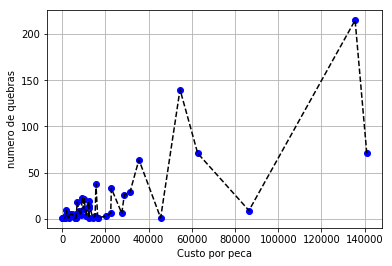

In [178]:
x = seriesToSingleDataFrame(dadosB, 'custoAcumulado');
y = seriesToSingleDataFrame(dadosB, 'QuebrasN');

neigh = KNeighborsRegressor(n_neighbors=3, weights='distance')
    
neigh.fit(x, y) ;

y_t = neigh.predict(x)

plt.plot(x,y, 'bo', x, y_t, '--k'); plt.grid()
plt.xlabel("Custo por peca") ; plt.ylabel("numero de quebras");


In [186]:
print r2_score(norm(y.QuebrasN.values), norm(y_t.flatten()) )

print calc_rss(norm(y.QuebrasN.values), norm(y_t.flatten()) )

1.0
0.0
